In [7]:
# pandas and numpy
import pandas as pd
import numpy as np
import yfinance as yf

# dates
from datetime import datetime

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# formatting options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 6)

# Define the start and end dates
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)

# Fetch data for a stock (e.g., Apple) from Yahoo Finance
stock_data = yf.download('AAPL', start=start, end=end)

# Display the first few rows of the fetched data
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.481125   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.203217   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.489624   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.610199   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.777832   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


# Moving Average

In [17]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# plotting inline
%matplotlib inline

# formatting options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)

# Define the start and end dates
start = datetime(2000, 1, 1)
end = datetime(2014, 12, 31)

# Fetch data for Microsoft from Yahoo Finance
msft = yf.download('MSFT', start=start, end=end)

# Display the first few rows of the fetched data
print(msft.head())

[*********************100%%**********************]  1 of 1 completed

                Open     High       Low     Close  Adj Close    Volume
Date                                                                  
2000-01-03  58.68750  59.3125  56.00000  58.28125  36.000622  53228400
2000-01-04  56.78125  58.5625  56.12500  56.31250  34.784538  54119000
2000-01-05  55.56250  58.1875  54.68750  56.90625  35.151276  64059600
2000-01-06  56.09375  56.9375  54.18750  55.00000  33.973797  54976600
2000-01-07  54.31250  56.1250  53.65625  55.71875  34.417778  62013600


[*********************100%%**********************]  1 of 1 completed

            Adj Close        MA7  MA30  MA90  MA120
Date                                               
2000-01-03  36.000622        NaN   NaN   NaN    NaN
2000-01-04  34.784538        NaN   NaN   NaN    NaN
2000-01-05  35.151276        NaN   NaN   NaN    NaN
2000-01-06  33.973797        NaN   NaN   NaN    NaN
2000-01-07  34.417778        NaN   NaN   NaN    NaN
...               ...        ...   ...   ...    ...
2000-01-18  35.614563  34.161309   NaN   NaN    NaN
2000-01-19  33.047222  33.965515   NaN   NaN    NaN
2000-01-20  32.738380  33.689755   NaN   NaN    NaN
2000-01-21  32.043465  33.441570   NaN   NaN    NaN
2000-01-24  31.271326  33.240264   NaN   NaN    NaN

[15 rows x 5 columns]


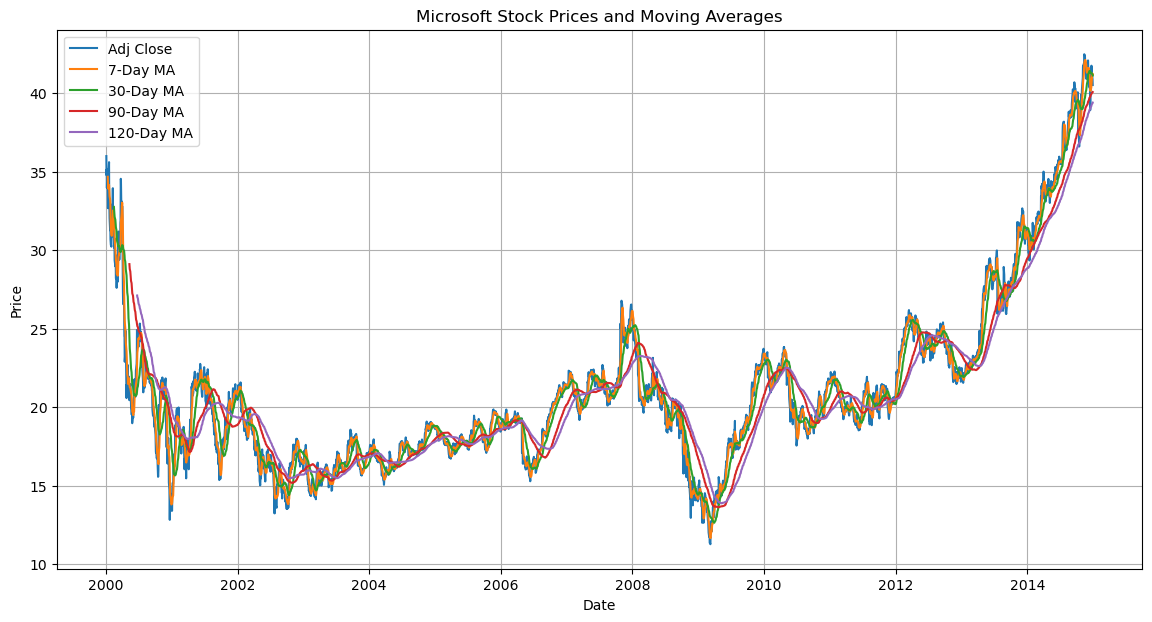

In [19]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# plotting inline
%matplotlib inline

# formatting options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)

# Define the start and end dates
start = datetime(2000, 1, 1)
end = datetime(2014, 12, 31)

# Fetch data for Microsoft from Yahoo Finance
msft = yf.download('MSFT', start=start, end=end)

# Calculate moving averages
msft['MA7'] = msft['Adj Close'].rolling(window=7).mean()
msft['MA30'] = msft['Adj Close'].rolling(window=30).mean()
msft['MA90'] = msft['Adj Close'].rolling(window=90).mean()
msft['MA120'] = msft['Adj Close'].rolling(window=120).mean()

# Display the first few rows to verify the calculations
print(msft[['Adj Close', 'MA7', 'MA30', 'MA90', 'MA120']].head(15))

# Plot the adjusted close prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(msft['Adj Close'], label='Adj Close')
plt.plot(msft['MA7'], label='7-Day MA')
plt.plot(msft['MA30'], label='30-Day MA')
plt.plot(msft['MA90'], label='90-Day MA')
plt.plot(msft['MA120'], label='120-Day MA')
plt.title('Microsoft Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

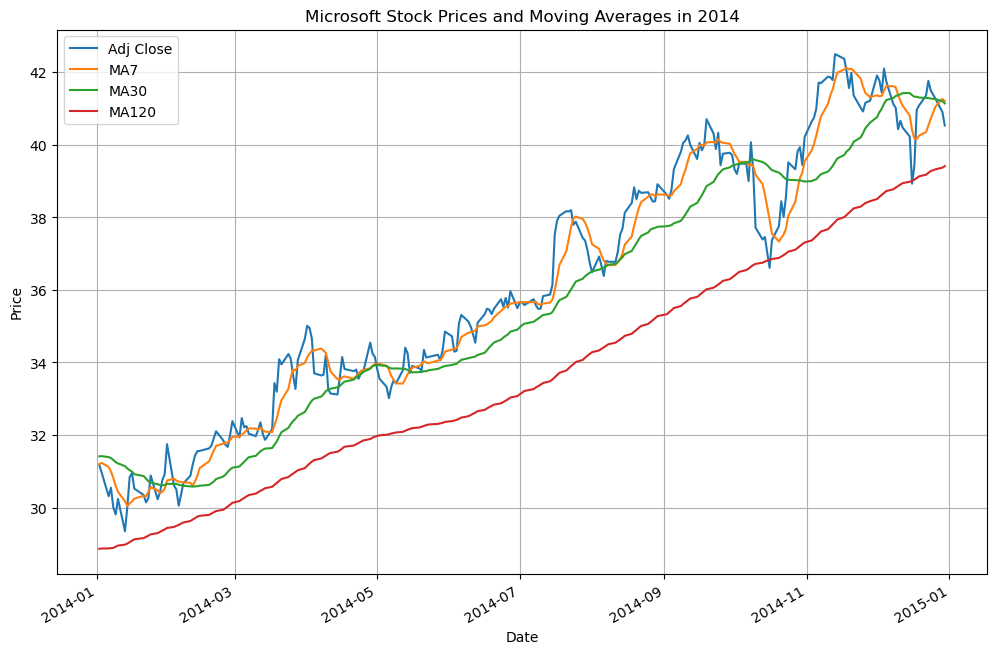

In [29]:
# Plot the price against the various rolling windows for the year 2014
msft.loc['2014', ['Adj Close', 'MA7', 'MA30', 'MA120']].plot(figsize=(12, 8))
plt.title('Microsoft Stock Prices and Moving Averages in 2014')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('5104OS_07_01.png', bbox_inches='tight', dpi=300)
plt.show()

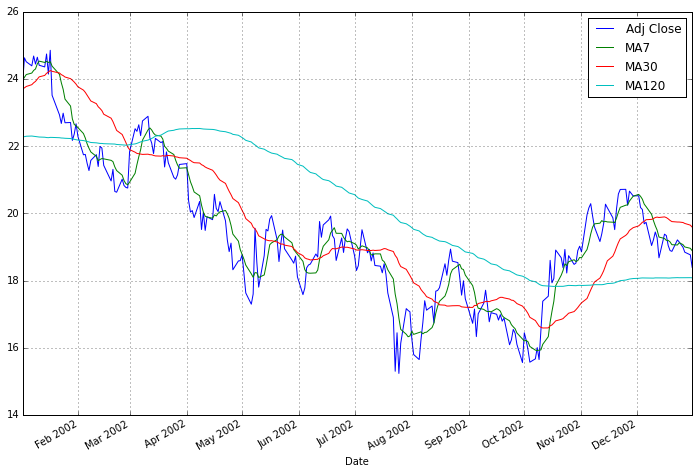

In [5]:
# plot the price against the various rolling windows
msft['2002'][['Adj Close', 'MA7', 
              'MA30', 'MA120']].plot(figsize=(12,8));
plt.savefig('5104OS_07_02.png', bbox_inches='tight', dpi=300)

# Exponential Weighted Moving Average

In [31]:
periods = 10
alpha = 2.0/(periods +1)
factors = (1-alpha) ** np.arange(1, 11)
sum_factors = factors.sum()
weights = factors/sum_factors
weights

array([0.21005616, 0.17186413, 0.14061611, 0.11504954, 0.09413145,
       0.07701664, 0.06301361, 0.05155659, 0.04218267, 0.03451309])

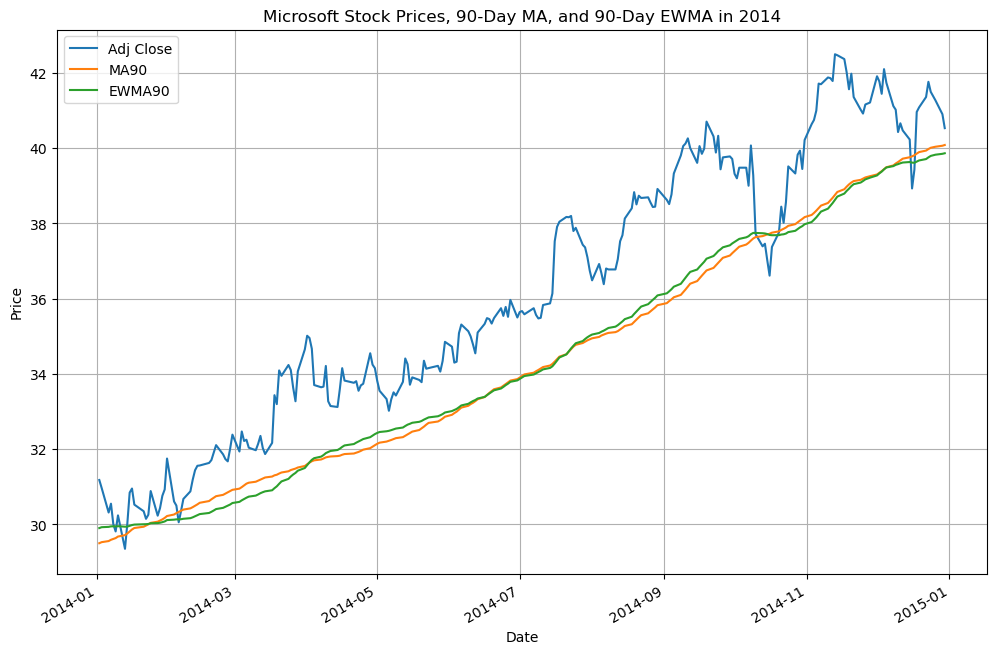

In [35]:
# Calculate 90-day moving average and EWMA
span = 90
msft_ewma = msft[['Adj Close']].copy()
msft_ewma['MA90'] = msft_ewma['Adj Close'].rolling(window=span).mean()
msft_ewma['EWMA90'] = msft_ewma['Adj Close'].ewm(span=span, adjust=False).mean()

# Plot the adjusted close prices, MA, and EWMA for 2014
msft_ewma.loc['2014', ['Adj Close', 'MA90', 'EWMA90']].plot(figsize=(12, 8))
plt.title('Microsoft Stock Prices, 90-Day MA, and 90-Day EWMA in 2014')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('5104OS_07_11.png', bbox_inches='tight', dpi=300)
plt.show()

# Technical analysis techniques

## Cross-overs

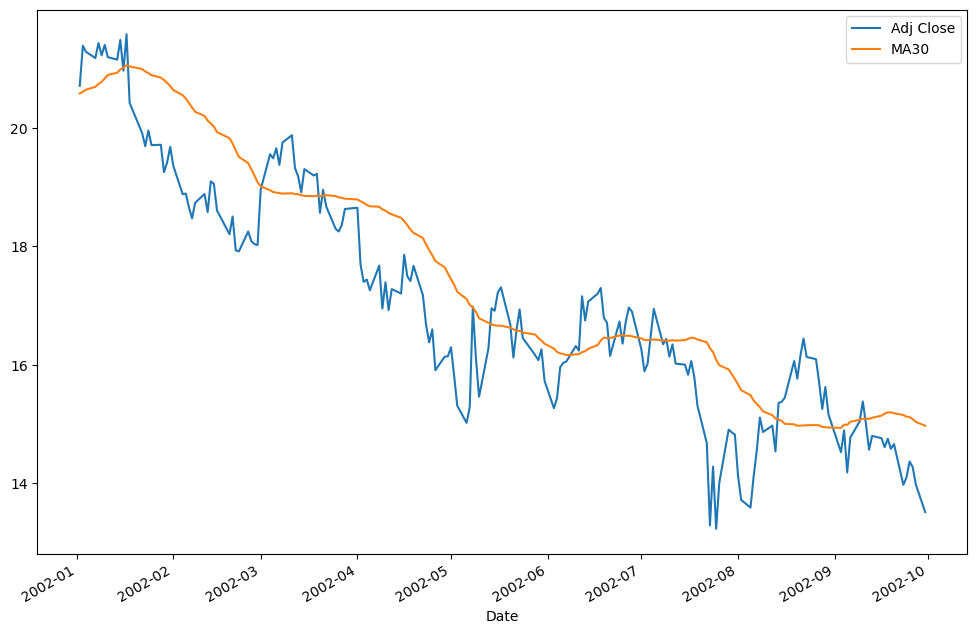

In [39]:
# plot MSFT July 2002 through Sept 2002
# there are several simple 30 day moving average cross overs
msft['2002-1':'2002-9'][['Adj Close', 
                         'MA30']].plot(figsize=(12,8));
plt.savefig('5104OS_07_12.png', bbox_inches='tight', dpi=300)

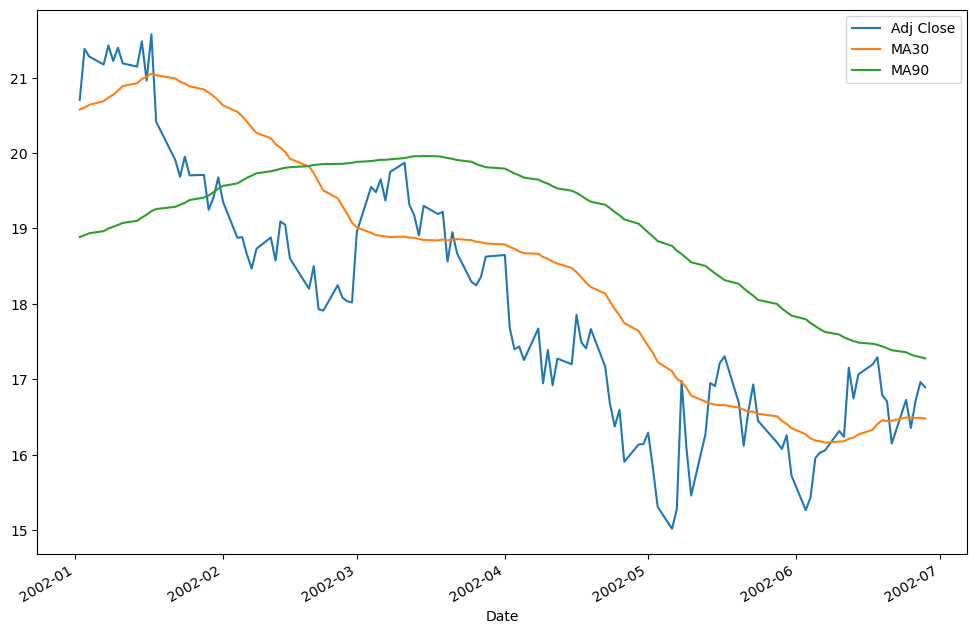

In [41]:
# plot 30 and 90 day moving average for MSFT Jan 2002 through June 2002
# there is one cross-over
msft['2002-1':'2002-6'][['Adj Close', 'MA30', 'MA90']
                       ].plot(figsize=(12,8));
plt.savefig('5104OS_07_13.png', bbox_inches='tight', dpi=300)

# Zipline

## Algo trading with Zipline  (Not support by Python3.7+)

### Zipline: buy apple

In [46]:
import zipline as zp

ModuleNotFoundError: No module named 'zipline'

In [11]:
class BuyApple(zp.TradingAlgorithm):
    """ Simple trading algorithm that does nothing
    but buy one share of AAPL every trading period.
    """
    
    trace=False
    
    def __init__(self, trace=False):
        BuyApple.trace = trace
        super(BuyApple, self).__init__()
    
    def initialize(context):
        if BuyApple.trace: print("---> initialize")
        if BuyApple.trace: print(context)
        if BuyApple.trace: print("<--- initialize")
        
    def handle_data(self, context):
        if BuyApple.trace: print("---> handle_data")
        if BuyApple.trace: print(context)
        self.order("AAPL", 1)
        if BuyApple.trace: print("<-- handle_data")  

AAPL


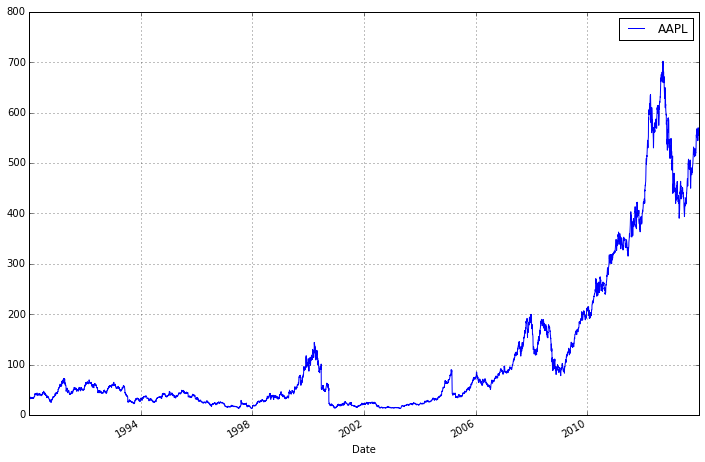

In [12]:
import zipline.utils.factory as zpf
# zipline has its own method to load data from Yahoo! Finance
data = zpf.load_from_yahoo(stocks=['AAPL'], 
                           indexes={}, 
                           start=datetime(1990, 1, 1),
                           end=datetime(2014, 1, 1), 
                           adjusted=False)
data.plot(figsize=(12,8));
plt.savefig('5104OS_07_15.png', bbox_inches='tight', dpi=300)

In [13]:
result = BuyApple(trace=True).run(data['2000-01-03':'2000-01-07'])

---> initialize
BuyApple(
    capital_base=100000.0
    sim_params=
SimulationParameters(
    period_start=2006-01-01 00:00:00+00:00,
    period_end=2006-12-31 00:00:00+00:00,
    capital_base=100000.0,
    data_frequency=daily,
    emission_rate=daily,
    first_open=2006-01-03 14:31:00+00:00,
    last_close=2006-12-29 21:00:00+00:00),
    initialized=False,
    slippage=VolumeShareSlippage(
    volume_limit=0.25,
    price_impact=0.1),
    commission=PerShare(cost=0.03, min trade cost=None),
    blotter=Blotter(
    transact_partial=(VolumeShareSlippage(
    volume_limit=0.25,
    price_impact=0.1), PerShare(cost=0.03, min trade cost=None)),
    open_orders=defaultdict(<type 'list'>, {}),
    orders={},
    new_orders=[],
    current_dt=None),
    recorded_vars={})
<--- initialize
---> handle_data
BarData({'AAPL': SIDData({'volume': 1000, 'sid': 'AAPL', 'source_id': 'DataFrameSource-53f29662cd4de3c2187a56ca1df22f57', 'dt': Timestamp('2000-01-03 00:00:00+0000', tz='UTC'), 'type': 4, '

[2015-04-25 19:30] INFO: Performance: Simulated 5 trading days out of 5.


[2015-04-25 19:30] INFO: Performance: first open: 2000-01-03 14:31:00+00:00


[2015-04-25 19:30] INFO: Performance: last close: 2000-01-07 21:00:00+00:00



BarData({'AAPL': SIDData({'price': 102.49989, 'volume': 1000, 'sid': 'AAPL', 'source_id': 'DataFrameSource-53f29662cd4de3c2187a56ca1df22f57', 'dt': Timestamp('2000-01-04 00:00:00+0000', tz='UTC'), 'type': 4})})
<-- handle_data
---> handle_data
BarData({'AAPL': SIDData({'price': 104.00011, 'volume': 1000, 'sid': 'AAPL', 'source_id': 'DataFrameSource-53f29662cd4de3c2187a56ca1df22f57', 'dt': Timestamp('2000-01-05 00:00:00+0000', tz='UTC'), 'type': 4})})
<-- handle_data
---> handle_data
BarData({'AAPL': SIDData({'price': 95.00008, 'volume': 1000, 'sid': 'AAPL', 'source_id': 'DataFrameSource-53f29662cd4de3c2187a56ca1df22f57', 'dt': Timestamp('2000-01-06 00:00:00+0000', tz='UTC'), 'type': 4})})
<-- handle_data
---> handle_data
BarData({'AAPL': SIDData({'price': 99.49996, 'volume': 1000, 'sid': 'AAPL', 'source_id': 'DataFrameSource-53f29662cd4de3c2187a56ca1df22f57', 'dt': Timestamp('2000-01-07 00:00:00+0000', tz='UTC'), 'type': 4})})
<-- handle_data


In [14]:
# orders for the first day of the simulation
result.iloc[0].orders

[{'amount': 1,
  'commission': None,
  'created': Timestamp('2000-01-03 00:00:00+0000', tz='UTC'),
  'dt': Timestamp('2000-01-03 00:00:00+0000', tz='UTC'),
  'filled': 0,
  'id': '4c976c1494df4d5ebbc97487b91c3857',
  'limit': None,
  'limit_reached': False,
  'sid': 'AAPL',
  'status': 0,
  'stop': None,
  'stop_reached': False}]

In [15]:
# orders for day 2
result.iloc[1].orders

[{'amount': 1,
  'commission': 0.03,
  'created': Timestamp('2000-01-03 00:00:00+0000', tz='UTC'),
  'dt': Timestamp('2000-01-04 00:00:00+0000', tz='UTC'),
  'filled': 1,
  'id': '4c976c1494df4d5ebbc97487b91c3857',
  'limit': None,
  'limit_reached': False,
  'sid': 'AAPL',
  'status': 1,
  'stop': None,
  'stop_reached': False},
 {'amount': 1,
  'commission': None,
  'created': Timestamp('2000-01-04 00:00:00+0000', tz='UTC'),
  'dt': Timestamp('2000-01-04 00:00:00+0000', tz='UTC'),
  'filled': 0,
  'id': '160e7fdadbab468db22c8e1920e8506f',
  'limit': None,
  'limit_reached': False,
  'sid': 'AAPL',
  'status': 0,
  'stop': None,
  'stop_reached': False}]

In [16]:
# what is our starting and ending cash in each day of trading,
# along with the value of our investments?
result[['starting_cash', 'ending_cash', 'ending_value']]

                     starting_cash   ending_cash  ending_value
2000-01-03 21:00:00   100000.00000  100000.00000       0.00000
2000-01-04 21:00:00   100000.00000   99897.47010     102.49989
2000-01-05 21:00:00    99897.47010   99793.43998     208.00022
2000-01-06 21:00:00    99793.43998   99698.40989     285.00024
2000-01-07 21:00:00    99698.40989   99598.87992     397.99984

In [17]:
# what is our portfolio value each day of trading?
# that is, how much cash on hand plus the value of our investments
pvalue = result.ending_cash + result.ending_value
pvalue

2000-01-03 21:00:00    100000.00000
2000-01-04 21:00:00     99999.96999
2000-01-05 21:00:00    100001.44020
2000-01-06 21:00:00     99983.41013
2000-01-07 21:00:00     99996.87976
dtype: float64

In [18]:
# zipline already calculates this for each day
result.portfolio_value

2000-01-03 21:00:00    100000.00000
2000-01-04 21:00:00     99999.96999
2000-01-05 21:00:00    100001.44020
2000-01-06 21:00:00     99983.41013
2000-01-07 21:00:00     99996.87976
Name: portfolio_value, dtype: float64

In [19]:
# what were our daily rates of return?
result.portfolio_value.pct_change()

2000-01-03 21:00:00            NaN
2000-01-04 21:00:00   -3.00102e-07
2000-01-05 21:00:00    1.47021e-05
2000-01-06 21:00:00   -1.80298e-04
2000-01-07 21:00:00    1.34719e-04
Name: portfolio_value, dtype: float64

In [20]:
# daily returns are already included in the results
result['returns']

2000-01-03 21:00:00    0.00000e+00
2000-01-04 21:00:00   -3.00102e-07
2000-01-05 21:00:00    1.47021e-05
2000-01-06 21:00:00   -1.80298e-04
2000-01-07 21:00:00    1.34719e-04
Name: returns, dtype: float64

In [21]:
# run the simulation for all of 2000
result_for_2000 = BuyApple().run(data['2000'])

[2015-04-25 19:31] INFO: Performance: Simulated 252 trading days out of 252.


[2015-04-25 19:31] INFO: Performance: first open: 2000-01-03 14:31:00+00:00


[2015-04-25 19:31] INFO: Performance: last close: 2000-12-29 21:00:00+00:00


In [22]:
# take a look at our cash and investment value
result_for_2000[['ending_cash', 'ending_value']]

                      ending_cash  ending_value
2000-01-03 21:00:00  100000.00000       0.00000
2000-01-04 21:00:00   99897.47010     102.49989
2000-01-05 21:00:00   99793.43998     208.00022
2000-01-06 21:00:00   99698.40989     285.00024
2000-01-07 21:00:00   99598.87992     397.99984
...                           ...           ...
2000-12-22 21:00:00   82082.86967    3705.00494
2000-12-26 21:00:00   82068.15213    3642.50992
2000-12-27 21:00:00   82053.30957    3688.32744
2000-12-28 21:00:00   82038.46700    3703.14000
2000-12-29 21:00:00   82023.56200    3733.62500

[252 rows x 2 columns]

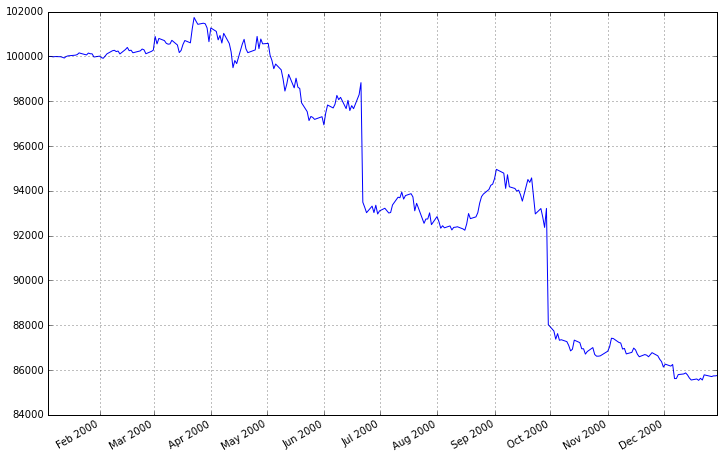

In [23]:
# visualize our portfolio value
result_for_2000.portfolio_value.plot(figsize=(12,8));
plt.savefig('5104OS_07_16.png', bbox_inches='tight', dpi=300)

[2015-04-25 19:31] INFO: Performance: Simulated 1256 trading days out of 1256.


[2015-04-25 19:31] INFO: Performance: first open: 2000-01-03 14:31:00+00:00


[2015-04-25 19:31] INFO: Performance: last close: 2004-12-31 21:00:00+00:00


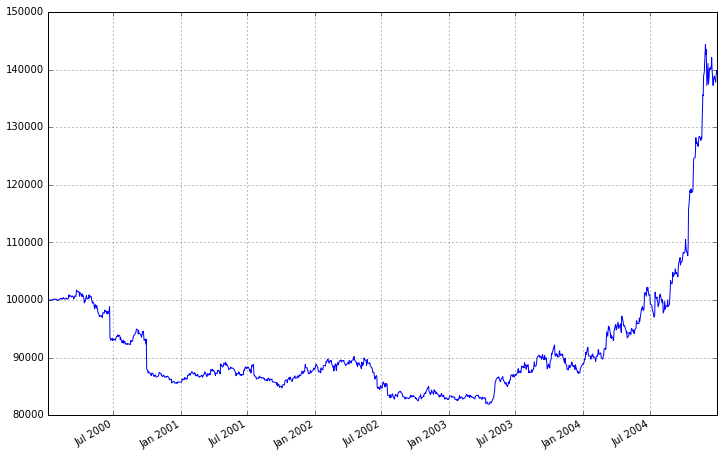

In [24]:
# run it over five years
result = BuyApple().run(data['2000':'2004']).portfolio_value
result.plot(figsize=(12,8));
plt.savefig('5104OS_07_17.png', bbox_inches='tight', dpi=300)

# Dual Moving Average Cross-Over

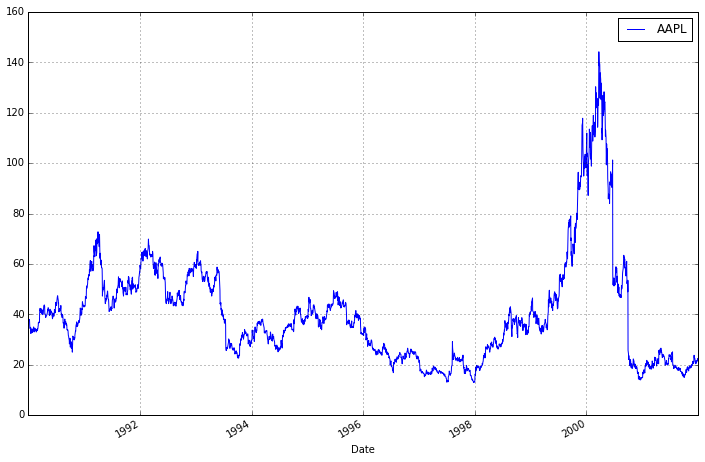

In [25]:
# reminder of the AAPL data
sub_data = data['1990':'2002-01-01']
sub_data.plot(figsize=(12,8));
plt.savefig('5104OS_07_18.png', bbox_inches='tight', dpi=300)

In [26]:
"""
The following algorithm implements a double moving average cross 
over. Investments will be made whenever the short moving average 
moves across the long moving average. We will trade only at the 
cross, not continuously buying or selling until the next cross. 
If trending down, we will sell all of our stock.  If trending up, 
we buy as many shares as possible up to 100. The strategy will 
record our buys and sells in extra data return from the simulation.
"""
class DualMovingAverage(zp.TradingAlgorithm):
    def initialize(context):
        # we need to track two moving averages, so we will set
        #these up in the context the .add_transform method 
        # informs zipline to execute a transform on every day 
        # of trading
        
        # the following will set up a MovingAverge transform, 
        # named short_mavg, accessing the .price field of the 
        # data, and a length of 100 days
        context.add_transform(zp.transforms.MovingAverage, 
                              'short_mavg', ['price'],
                              window_length=100)

        # and the following is a 400 day MovingAverage
        context.add_transform(zp.transforms.MovingAverage,
                              'long_mavg', ['price'],
                              window_length=400)

        # this is a flag we will use to track the state of 
        # whether or not we have made our first trade when the 
        # means cross.  We use it to identify the single event 
        # and to prevent further action until the next cross
        context.invested = False

    def handle_data(self, data):
        # access the results of the transforms
        short_mavg = data['AAPL'].short_mavg['price']
        long_mavg = data['AAPL'].long_mavg['price']
        
        # these flags will record if we decided to buy or sell
        buy = False
        sell = False

        # check if we have crossed
        if short_mavg > long_mavg and not self.invested:
            # short moved across the long, trending up
            # buy up to 100 shares
            self.order_target('AAPL', 100)
            # this will prevent further investment until 
            # the next cross
            self.invested = True
            buy = True # records that we did a buy
        elif short_mavg < long_mavg and self.invested:
            # short move across the long, tranding down
            # sell it all!
            self.order_target('AAPL', -100)
            # prevents further sales until the next cross
            self.invested = False
            sell = True # and note that we did sell

        # add extra data to the results of the simulation to 
        # give the short and long ma on the interval, and if 
        # we decided to buy or sell
        self.record(short_mavg=short_mavg,
                    long_mavg=long_mavg,
                    buy=buy,
                    sell=sell)

In [27]:
# run the simulation
results = DualMovingAverage().run(sub_data)

[2015-04-25 19:32] INFO: Performance: Simulated 3028 trading days out of 3028.


[2015-04-25 19:32] INFO: Performance: first open: 1990-01-02 14:31:00+00:00


[2015-04-25 19:32] INFO: Performance: last close: 2001-12-31 21:00:00+00:00


In [28]:
# draw plots of the results
def analyze(data, perf):
    fig = plt.figure() # create the plot
    
    # the top will be a plot of long/short ma vs price
    ax1 = fig.add_subplot(211,  ylabel='Price in $')
    data['AAPL'].plot(ax=ax1, color='r', lw=2.)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

    # the following puts an upward triangle at each point 
    # we decided to buy
    ax1.plot(perf.ix[perf.buy].index, perf.short_mavg[perf.buy],
             '^', markersize=10, color='m')
    # and the following a downward triangle where we sold
    ax1.plot(perf.ix[perf.sell].index, perf.short_mavg[perf.sell],
             'v', markersize=10, color='k')

    # bottom plot is the portfolio value
    ax2 = fig.add_subplot(212, ylabel='Portfolio value in $')
    perf.portfolio_value.plot(ax=ax2, lw=2.)

    # and also has the marks for buy and sell points
    ax2.plot(perf.ix[perf.buy].index, 
             perf.portfolio_value[perf.buy],
             '^', markersize=10, color='m')
    ax2.plot(perf.ix[perf.sell].index, 
             perf.portfolio_value[perf.sell],
             'v', markersize=10, color='k')

    # and set the legend position and size of the result
    plt.legend(loc=0)
    plt.gcf().set_size_inches(14, 10)
    plt.savefig('5104OS_07_19.png', bbox_inches='tight', dpi=300)

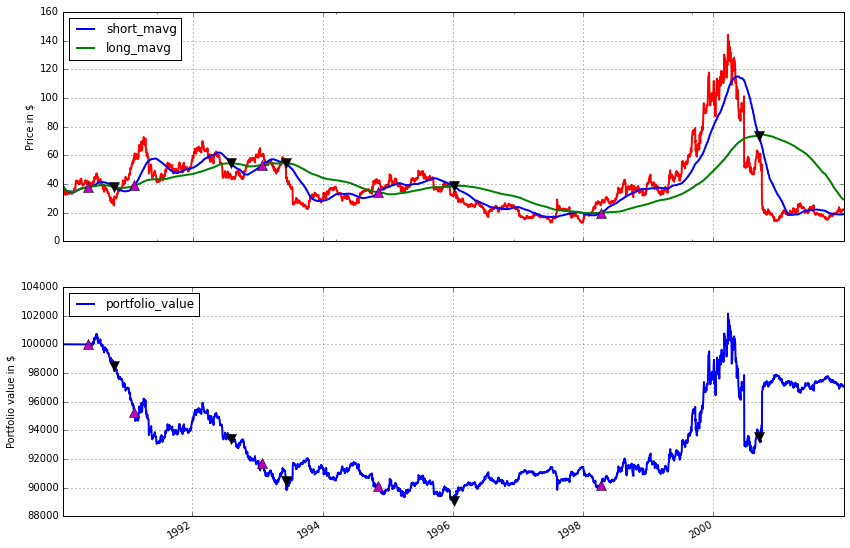

In [29]:
# visually analyze the results
analyze(sub_data, results)

## Pair trading

PEP
KO


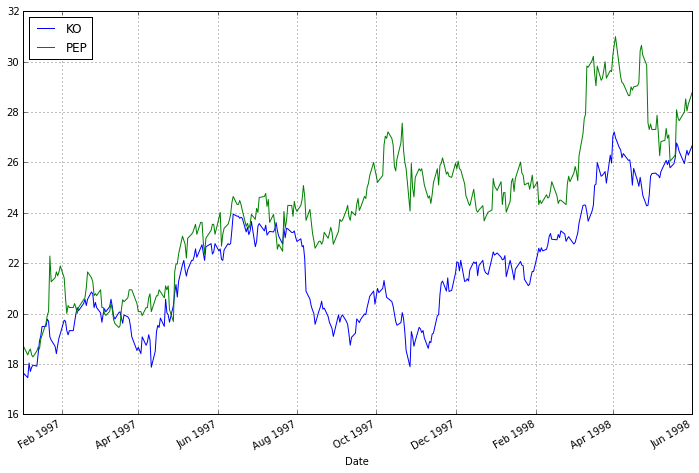

In [30]:
# load data for Coke and Pepsi and visualize
data = zpf.load_from_yahoo(stocks=['PEP', 'KO'], 
                           indexes={},
                           start=datetime(1997, 1, 1), 
                           end=datetime(1998, 6, 1), 
                           adjusted=True)
data.plot(figsize=(12,8));
plt.savefig('5104OS_07_20.png', bbox_inches='tight', dpi=300)

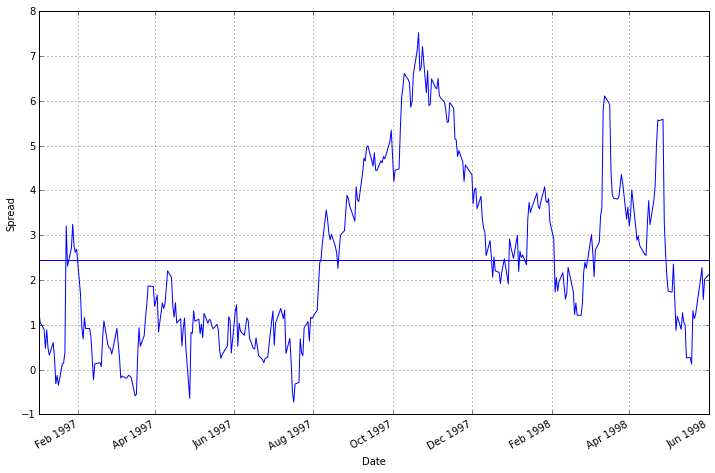

In [31]:
# calculate and plot the spread
data['Spread'] = data.PEP - data.KO
data['1997':].Spread.plot(figsize=(12,8))
plt.ylabel('Spread')
plt.axhline(data.Spread.mean());
plt.savefig('5104OS_07_21.png', bbox_inches='tight', dpi=300)

In [32]:
import statsmodels.api as sm
@zp.transforms.batch_transform
def ols_transform(data, ticker1, ticker2):
    """Compute the ordinary least squares of two series.
    """
    p0 = data.price[ticker1]
    p1 = sm.add_constant(data.price[ticker2], prepend=True)
    slope, intercept = sm.OLS(p0, p1).fit().params

    return slope, intercept

In [33]:
class Pairtrade(zp.TradingAlgorithm):
    """ Pairtrade algorithm for two stocks, using a window 
    of 100 days for calculation of the z-score and 
    normalization of the spread. We will execute on the spread 
    when the z-score is > 2.0 or < -2.0. If the absolute value 
    of the z-score is < 0.5, then we will empty our position 
    in the market to limit exposure.
    """
    def initialize(self, window_length=100):
        self.spreads=[]
        self.invested=False
        self.window_length=window_length
        self.ols_transform= \
            ols_transform(refresh_period=self.window_length,
                          window_length=self.window_length)

    def handle_data(self, data):
        # calculate the regression, will be None until 100 samples
        params=self.ols_transform.handle_data(data, 'PEP', 'KO')
        if params:
            # get the intercept and slope
            intercept, slope=params

            # now get the z-score
            zscore=self.compute_zscore(data, slope, intercept)

            # record the z-score
            self.record(zscore=zscore)

            # execute based upon the z-score
            self.place_orders(data, zscore)

    def compute_zscore(self, data, slope, intercept):
        # calculate the spread
        spread=(data['PEP'].price-(slope*data['KO'].price+ 
                                       intercept))
        self.spreads.append(spread) # record for z-score calc
        self.record(spread = spread)
        
        # now calc the z-score
        spread_wind=self.spreads[-self.window_length:]
        zscore=(spread - np.mean(spread_wind))/np.std(spread_wind)
        return zscore

    def place_orders(self, data, zscore):
        if zscore>=2.0 and not self.invested:
            # buy the spread, buying PEP and selling KO
            self.order('PEP', int(100/data['PEP'].price))
            self.order('KO', -int(100/data['KO'].price))
            self.invested=True
            self.record(action="PK")
        elif zscore<=-2.0 and not self.invested:
            # buy the spread, buying KO and selling PEP
            self.order('PEP', -int(100 / data['PEP'].price))
            self.order('KO', int(100 / data['KO'].price))
            self.invested = True
            self.record(action='KP')
        elif abs(zscore)<.5 and self.invested:
            # minimize exposure
            ko_amount=self.portfolio.positions['KO'].amount
            self.order('KO', -1*ko_amount)
            pep_amount=self.portfolio.positions['PEP'].amount
            self.order('PEP', -1*pep_amount)
            self.invested=False
            self.record(action='DE')
        else:
            # take no action
            self.record(action='noop')

In [34]:
perf = Pairtrade().run(data['1997':])

[2015-04-25 19:32] INFO: Performance: Simulated 356 trading days out of 356.


[2015-04-25 19:32] INFO: Performance: first open: 1997-01-02 14:31:00+00:00


[2015-04-25 19:32] INFO: Performance: last close: 1998-06-01 20:00:00+00:00


In [35]:
# what actions did we take?
selection = ((perf.action=='PK') | (perf.action=='KP') |
             (perf.action=='DE'))
actions = perf[selection][['action']]
actions

                    action
1997-07-16 20:00:00     KP
1997-07-22 20:00:00     DE
1997-08-05 20:00:00     PK
1997-10-15 20:00:00     DE
1998-03-09 21:00:00     PK
1998-04-28 20:00:00     DE

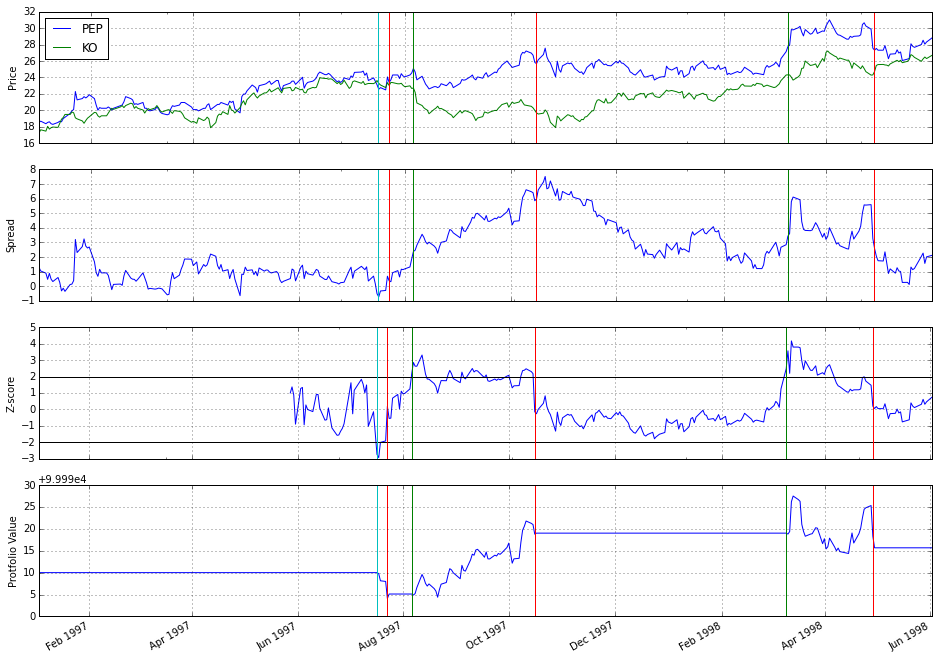

In [36]:
# plot prices
ax1 = plt.subplot(411)
data[['PEP', 'KO']].plot(ax=ax1)
plt.ylabel('Price')

# plot spread
ax2 = plt.subplot(412, sharex=ax1)
data.Spread.plot(ax=ax2)
plt.ylabel('Spread')

# plot z-scores
ax3 = plt.subplot(413)
perf['1997':].zscore.plot()
ax3.axhline(2, color='k')
ax3.axhline(-2, color='k')
plt.ylabel('Z-score')

# plot portfolio value
ax4 = plt.subplot(414)
perf['1997':].portfolio_value.plot()
plt.ylabel('Protfolio Value')

# draw lines where we took actions
for ax in [ax1, ax2, ax3, ax4]:
    for d in actions.index[actions.action=='PK']:
        ax.axvline(d, color='g')
    for d in actions.index[actions.action=='KP']:
        ax.axvline(d, color='c')
    for d in actions.index[actions.action=='DE']:
        ax.axvline(d, color='r')

plt.gcf().set_size_inches(16, 12)
plt.savefig('5104OS_07_22.png', bbox_inches='tight', dpi=300)